In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def buggy_pca(X, d):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    return Vt[:d, :].T, U[:, :d] * S[:d]

def demeaned_pca(X, d):
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    return Vt[:d, :].T, U[:, :d] * S[:d], np.mean(X, axis=0)

def normalized_pca(X, d):
    X_centered = X - np.mean(X, axis=0)
    X_normalized = X_centered / np.std(X_centered, axis=0)
    U, S, Vt = np.linalg.svd(X_normalized, full_matrices=False)
    return Vt[:d, :].T, U[:, :d] * S[:d], np.mean(X, axis=0), np.std(X_centered, axis=0)

def dro(X, d):
    b = np.mean(X, axis=0)
    Y = X - b
    U, Sigma, Vt = np.linalg.svd(Y, full_matrices=False)
    
    U_d = U[:, :d]
    Sigma_d = np.diag(Sigma[:d])
    A = U_d @ Sigma_d
    Z = Vt[:d, :]
    
    return A, Z, b

In [61]:
# Function to load the datasets
def load_data(file_name):
    return pd.read_csv(file_name, header=None).values


data2D = load_data('data2D.csv')
data1000D = load_data('data1000D.csv')

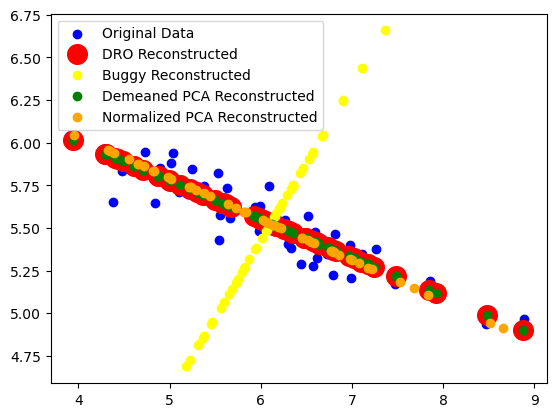

Reconstruction Error for 2D dataset:
DRO: 0.5003042814256455
Buggy PCA: 44.34515418673971
Demeaned PCA: 0.5003042814256455
Normalized PCA: 2.4736041727385354


In [65]:
def reconstruction_error(X, X_reconstructed):
    return np.linalg.norm(X - X_reconstructed, 'fro')**2

# Apply the four methods to the 2D dataset
A_dro_2D, Z_dro_2D, b_dro_2D = dro(data2D, d=1)
A_buggy_2D, Z_buggy_2D = buggy_pca(data2D, d=1)
A_demeaned_2D, Z_demeaned_2D, b_demeaned_2D = demeaned_pca(data2D, d=1)
A_normalized_2D, Z_normalized_2D, b_normalized_2D, std = normalized_pca(data2D, d=1)

data2D_reconstructed_dro = A_dro_2D @ Z_dro_2D + b_dro_2D
data2D_reconstructed_buggy = Z_buggy_2D @ A_buggy_2D.T
data2D_reconstructed_demeaned = Z_demeaned_2D @ A_demeaned_2D.T + b_demeaned_2D
data2D_reconstructed_normalized = (Z_normalized_2D @ A_normalized_2D.T)*std + b_normalized_2D

# Plot the original and reconstructed points for the 2D dataset
plt.scatter(data2D[:, 0], data2D[:, 1], c='blue', label='Original Data')
plt.scatter(data2D_reconstructed_dro[:, 0], data2D_reconstructed_dro[:, 1], c='red', s=200,  label='DRO Reconstructed')
plt.scatter(data2D_reconstructed_buggy[:, 0], data2D_reconstructed_buggy[:, 1], c='yellow', label='Buggy Reconstructed')
plt.scatter(data2D_reconstructed_demeaned[:, 0], data2D_reconstructed_demeaned[:, 1], c='green', label='Demeaned PCA Reconstructed')
plt.scatter(data2D_reconstructed_normalized[:, 0], data2D_reconstructed_normalized[:, 1], c='orange', label='Normalized PCA Reconstructed')
plt.legend()
plt.show()

# Calculate reconstruction errors for the 2D dataset
error_dro_2D = reconstruction_error(data2D, data2D_reconstructed_dro)
error_buggy_2D = reconstruction_error(data2D, data2D_reconstructed_buggy)
error_demeaned_2D = reconstruction_error(data2D, data2D_reconstructed_demeaned)
error_normalized_2D = reconstruction_error(data2D, data2D_reconstructed_normalized)

# Display reconstruction errors
print("Reconstruction Error for 2D dataset:")
print("DRO:", error_dro_2D)
print("Buggy PCA:", error_buggy_2D)
print("Demeaned PCA:", error_demeaned_2D)
print("Normalized PCA:", error_normalized_2D)

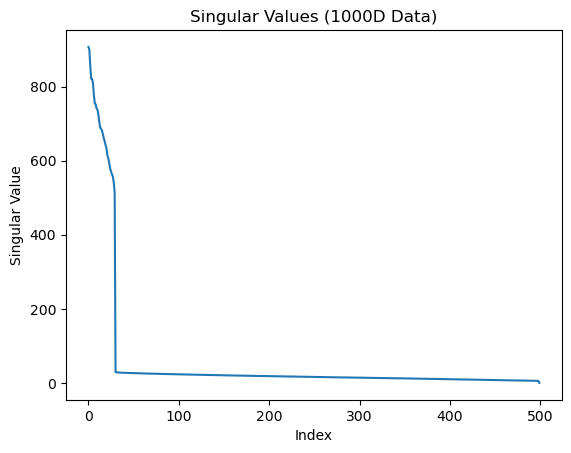

There is a knee point beween 1 and 100
by printing all singular value(not show here), we can get d =30 because we d>30, singular value decreases from 5*10^2 to 2*10^1 

Reconstruction Error for 1000D dataset:
DRO: 136522.97948930142
Buggy: 257582115.76148316
Demeaned PCA: 136522.97948930142
Normalized PCA: 136814.29049881158


In [71]:
U, S, Vt = np.linalg.svd(data1000D - np.mean(data1000D, axis=0), full_matrices=False)
plt.plot(S)
plt.title('Singular Values (1000D Data)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.show()
print("There is a knee point beween 1 and 100")
print("by printing all singular value(not show here), we can get d =30 because we d>30, singular value decreases from 5*10^2 to 2*10^1 ")

d_1000D = 30 

A_dro_1000D, Z_dro_1000D, b_dro_1000D = dro(data1000D, d=d_1000D)
A_demeaned_1000D, Z_demeaned_1000D = buggy_pca(data1000D,d=d_1000D)
A_demeaned_1000D, Z_demeaned_1000D, b_demeaned_1000D = demeaned_pca(data1000D, d=d_1000D)
A_normalized_1000D, Z_normalized_1000D, b_normalized_1000D, std_1000D = normalized_pca(data1000D, d=d_1000D)

data1000D_reconstructed_dro = A_dro_1000D @ Z_dro_1000D + b_dro_1000D
data1000D_reconstructed_buggy =  Z_demeaned_1000D@A_demeaned_1000D.T 
data1000D_reconstructed_demeaned =  Z_demeaned_1000D@A_demeaned_1000D.T + b_demeaned_1000D
data1000D_reconstructed_normalized = (Z_normalized_1000D@A_normalized_1000D.T)*std_1000D + b_normalized_1000D

error_dro_1000D = reconstruction_error(data1000D, data1000D_reconstructed_dro)
error_buggy_1000D = reconstruction_error(data1000D, data1000D_reconstructed_buggy)
error_demeaned_1000D = reconstruction_error(data1000D, data1000D_reconstructed_demeaned)
error_normalized_1000D = reconstruction_error(data1000D, data1000D_reconstructed_normalized)

print("\nReconstruction Error for 1000D dataset:")
print("DRO:", error_dro_1000D)
print("Buggy:", error_buggy_1000D)
print("Demeaned PCA:", error_demeaned_1000D)
print("Normalized PCA:", error_normalized_1000D)